# 2-parameter interpolation for single-qubit $R(\theta_X, \theta_Y)$ gates

In [1]:
import random
from scipy.spatial import Delaunay
from qctrl_optimize import hamiltonians
from qctrl_optimize import optimize as opt
from qctrl_optimize import gates
from qctrl_optimize import simulate as sim
from qctrl_optimize import interpolate as interp
from qctrl_optimize import plot as plotter
from qctrl import Qctrl
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pickle
from itertools import product
qctrl = Qctrl()

Q-CTRL package update available.

Your version is 20.0.2. Latest version is 20.1.0.

Visit ]8;id=440729;https://boulder.q-ctrl.com/changelog\boulder.q-ctrl.com/changelog]8;;\ for the latest product updates.

In [2]:
# Set up parameters for the Interpolater

num_pwc_segments = 20
segment_count = 500
duration = 60
sample_times = np.linspace(0, duration, segment_count)
amplitude = 40e-3
tik0 = 1e-2
tik0 = tik0 / (amplitude**2 * num_pwc_segments)
seed = 0 # reproducability

# get sets of reference points and testing points
granularity_train = 1/3
granularity_test = 1/8
npts_train = int(1+1/granularity_train)
npts_test = int(1+1/granularity_test)
train_points = np.array(list(product(np.linspace(0,1,npts_train), np.linspace(0,1,npts_train))))
test_points = np.array(list(product(np.linspace(0,1,npts_test), np.linspace(0,1,npts_test))))

# function mapping pulse signals to Hamiltonian
def sigs_to_ham(graph, signals):
    hamiltonian, _,_,= hamiltonians.single_transmon_hamiltonian_from_signals(graph, sample_times, vars=signals)
    return hamiltonian

# function mapping (graph, target, signals) => graph.infidelity
infid_func = opt.get_ham_infid_func(sigs_to_ham)

var_shape = (hamiltonians.TRANSMON_QUBIT_N_SIG, num_pwc_segments)
# function mapping pulse optimizable variables to signal objects
vals_to_sigs = opt.get_vals_to_sigs_pwc(duration, var_shape, amplitude)

def r2(tx, ty):
    return gates.r3(tx, ty, 0)

In [3]:
# This cell will make many print statements - beware!
# This cell will take around 2-3 minutes to execute in full.

interpolater = interp.Interpolater(qctrl, r2, tik0, interp.neighbor_avg, seed, infid_func, vals_to_sigs)

# initial optimization
opt_var_results, n_iters = interpolater.train(train_points, first_run=True)
infids, simplices = interpolater.test_interpolations(train_points, opt_var_results, test_points)

# re-optimize points, with highest neighbor-tikhonov penalty first
train_points_1, opt_var_results_sorted = interp.sort_points_by_tik(train_points, opt_var_results)
opt_var_results1, n_iters1 = interpolater.train(train_points_1, all_opt_var_results=opt_var_results_sorted)
infids1, simplices1 = interpolater.test_interpolations(train_points_1, opt_var_results1, test_points)

[0. 0.]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580360") has completed.
Iterations:	21
Optimized cost:	3.854e-09
Infidelity:	2.093e-12
Tikhonov:	3.852e-09
[0.         0.33333333]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580362") has completed.
Iterations:	26
Optimized cost:	6.216e-04
Infidelity:	1.464e-06
Tikhonov:	6.201e-04
[0.         0.66666667]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580364") has completed.
Iterations:	27
Optimized cost:	2.486e-03
Infidelity:	5.659e-06
Tikhonov:	2.481e-03
[0. 1.]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580366") has completed.
Iterations:	32
Optimized cost:	6.038e-03
Infidelity:	3.976e-05
Tikhonov:	5.999e-03
[0.33333333 0.        ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580368") has completed.
Iterations:	31
Optimized cost:	6.215e-04
Infidelity:	1.436e-06
Tikhonov:	6.201e-04
[0.33333333 0.33333333]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580370") has completed.
Iterations:	34
Optimized cost:	1.243e-03
Infidelity:	2.960e-06
Tikhonov:	1.240e-03
[0.33333333 0.66666667]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580372") has completed.
Iterations:	18
Optimized cost:	5.926e-02
Infidelity:	4.946e-02
Tikhonov:	9.800e-03
[0.33333333 1.        ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580373") has completed.
Iterations:	36
Optimized cost:	5.258e-03
Infidelity:	1.931e-05
Tikhonov:	5.238e-03
[0.66666667 0.        ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580374") has completed.
Iterations:	32
Optimized cost:	2.486e-03
Infidelity:	5.674e-06
Tikhonov:	2.481e-03
[0.66666667 0.33333333]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580375") has completed.
Iterations:	29
Optimized cost:	7.128e-02
Infidelity:	6.128e-02
Tikhonov:	9.992e-03
[0.66666667 0.66666667]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580376") has completed.
Iterations:	32
Optimized cost:	7.265e-03
Infidelity:	8.175e-05
Tikhonov:	7.183e-03
[0.66666667 1.        ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580377") has completed.
Iterations:	51
Optimized cost:	3.593e-03
Infidelity:	9.581e-06
Tikhonov:	3.584e-03
[1. 0.]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580378") has completed.
Iterations:	44
Optimized cost:	6.038e-03
Infidelity:	3.976e-05
Tikhonov:	5.999e-03
[1.         0.33333333]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580379") has completed.
Iterations:	43
Optimized cost:	5.165e-03
Infidelity:	1.859e-05
Tikhonov:	5.146e-03
[1.         0.66666667]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580380") has completed.
Iterations:	49
Optimized cost:	3.580e-03
Infidelity:	8.864e-06
Tikhonov:	3.571e-03
[1. 1.]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580381") has completed.
Iterations:	25
Optimized cost:	1.920e-03
Infidelity:	4.393e-06
Tikhonov:	1.915e-03


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_graph (action_id="1580383") has started.
Your task calculate_graph (action_id="1580383") has completed.
infidelity_0: 	2.093e-12
infidelity_1: 	1.987e-07
infidelity_2: 	8.086e-07
infidelity_3: 	1.838e-06
infidelity_4: 	3.251e-06
infidelity_5: 	4.993e-06
infidelity_6: 	5.006e-01
infidelity_7: 	8.551e-01
infidelity_8: 	3.976e-05
infidelity_9: 	1.934e-07
infidelity_10: 	3.901e-07
infidelity_11: 	9.573e-07
infidelity_12: 	1.933e-06
infidelity_13: 	3.411e-06
infidelity_14: 	4.366e-01
infidelity_15: 	8.213e-01
infidelity_16: 	8.732e-01
infidelity_17: 	1.893e-03
infidelity_18: 	7.870e-07
infidelity_19: 	9.906e-07
infidelity_20: 	1.621e-06
infidelity_21: 	2.611e-06
infidelity_22: 	4.473e-01
infidelity_23: 	9.379e-01
infidelity_24: 	6.279e-01
infidelity_25: 	5.417e-01
infidelity_26: 	1.237e-03
infidelity_27: 	1.814e-06
infidelity_28: 	1.258e-01
infidelity_29: 	1.262e-01
infidelity_30: 	4.128e-01
infidelity_31: 	9.591e-01
infidelity_32: 	7.570e-02
infidelity_33: 	2.809e-02
in

  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580389") has completed.
Iterations:	28
Optimized cost:	8.332e-03
Infidelity:	1.939e-05
Tikhonov:	8.313e-03
[0.         0.66666667]
[15  3  4]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580391") has completed.
Iterations:	37
Optimized cost:	8.428e-03
Infidelity:	2.053e-05
Tikhonov:	8.407e-03
[0.66666667 0.33333333]
[ 8  6  0  5 12 11 10  3]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580393") has completed.
Iterations:	30
Optimized cost:	7.441e-03
Infidelity:	1.930e-05
Tikhonov:	7.422e-03
[0.33333333 0.66666667]
[ 2 10  6 15  1 14  7  4]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580395") has completed.
Iterations:	36
Optimized cost:	5.225e-03
Infidelity:	1.450e-05
Tikhonov:	5.210e-03
[0. 1.]
[3 1 7]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580397") has completed.
Iterations:	25
Optimized cost:	4.956e-03
Infidelity:	4.450e-05
Tikhonov:	4.912e-03
[1. 0.]
[ 2  0 12]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580398") has completed.
Iterations:	33
Optimized cost:	4.892e-03
Infidelity:	4.354e-05
Tikhonov:	4.849e-03
[0.33333333 0.33333333]
[15  8  2  3]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580399") has completed.
Iterations:	16
Optimized cost:	5.010e-08
Infidelity:	5.564e-10
Tikhonov:	4.954e-08
[0.33333333 1.        ]
[ 3 14  4]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580400") has completed.
Iterations:	21
Optimized cost:	9.164e-03
Infidelity:	3.216e-05
Tikhonov:	9.132e-03
[0.33333333 0.        ]
[15  9  6  2  0]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580401") has completed.
Iterations:	13
Optimized cost:	2.165e-04
Infidelity:	5.554e-07
Tikhonov:	2.160e-04
[0. 0.]
[ 8 15]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580402") has completed.
Iterations:	9
Optimized cost:	3.097e-04
Infidelity:	6.748e-07
Tikhonov:	3.090e-04
[0.66666667 0.66666667]
[11 14  2  3]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580403") has completed.
Iterations:	20
Optimized cost:	5.791e-03
Infidelity:	2.343e-05
Tikhonov:	5.768e-03
[1.         0.66666667]
[14 10 13  2 12]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580404") has completed.
Iterations:	21
Optimized cost:	2.649e-03
Infidelity:	6.734e-06
Tikhonov:	2.642e-03
[1.         0.33333333]
[ 2  5 11]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580405") has completed.
Iterations:	25
Optimized cost:	8.993e-03
Infidelity:	2.651e-05
Tikhonov:	8.966e-03
[1. 1.]
[14 11]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580406") has completed.
Iterations:	16
Optimized cost:	2.137e-04
Infidelity:	4.943e-07
Tikhonov:	2.132e-04
[0.66666667 1.        ]
[11 10 13  3  7]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580407") has completed.
Iterations:	28
Optimized cost:	2.644e-03
Infidelity:	7.033e-06
Tikhonov:	2.637e-03
[0.         0.33333333]
[8 9 6 3 1]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_optimization (action_id="1580408") has completed.
Iterations:	13
Optimized cost:	2.181e-04
Infidelity:	5.322e-07
Tikhonov:	2.176e-04


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_graph (action_id="1580409") has started.
Your task calculate_graph (action_id="1580409") has completed.
infidelity_0: 	6.748e-07
infidelity_1: 	2.841e-06
infidelity_2: 	1.936e-06
infidelity_3: 	1.631e-06
infidelity_4: 	2.273e-05
infidelity_5: 	2.139e-05
infidelity_6: 	2.382e-05
infidelity_7: 	3.237e-05
infidelity_8: 	4.450e-05
infidelity_9: 	1.244e-06
infidelity_10: 	7.951e-06
infidelity_11: 	7.632e-06
infidelity_12: 	2.860e-06
infidelity_13: 	7.601e-06
infidelity_14: 	3.398e-05
infidelity_15: 	3.174e-05
infidelity_16: 	2.339e-05
infidelity_17: 	8.381e-01
infidelity_18: 	8.362e-07
infidelity_19: 	6.803e-06
infidelity_20: 	5.455e-06
infidelity_21: 	2.291e-06
infidelity_22: 	4.618e-06
infidelity_23: 	1.891e-05
infidelity_24: 	1.582e-05
infidelity_25: 	8.530e-01
infidelity_26: 	5.186e-01
infidelity_27: 	6.752e-07
infidelity_28: 	9.427e-07
infidelity_29: 	1.560e-06
infidelity_30: 	2.574e-06
infidelity_31: 	1.056e-05
infidelity_32: 	2.188e-05
infidelity_33: 	4.955e-01
in

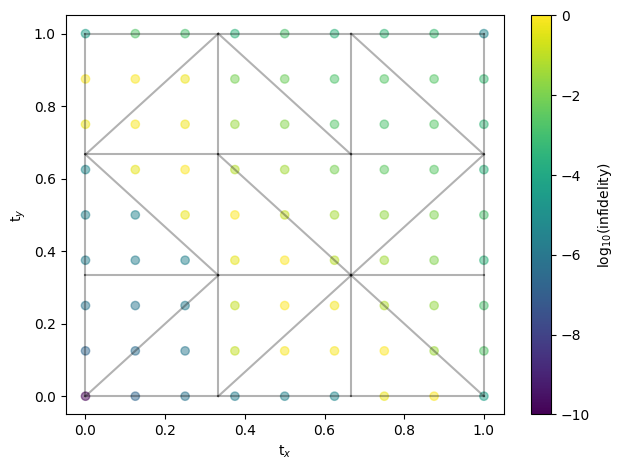

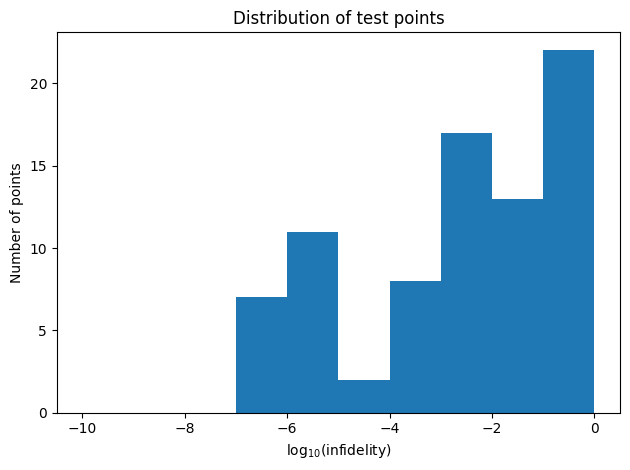

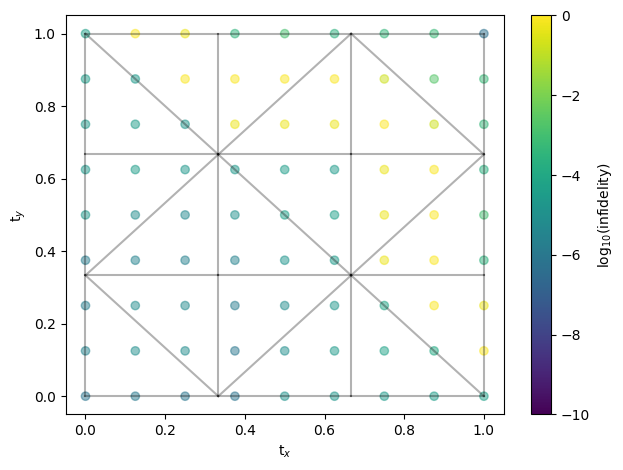

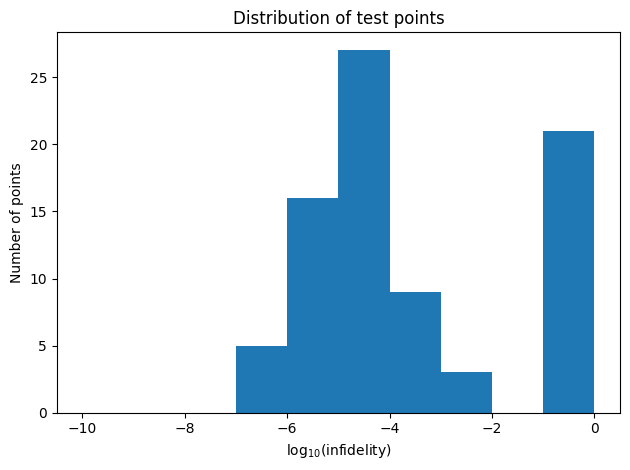

In [4]:
plotter.plot_interpolation_2d(test_points, np.log10(infids), train_points, simplices)
plotter.plot_interpolation_2d(test_points, np.log10(infids1), train_points_1, simplices1)

We observe a yellow band indicating poor interpolation quality. As in `interpolate-rx.ipynb`, this occurs roughly around $\theta=\pi$, where it is "easier to go the other way around the sphere" in a sense. We can solve this problem by dividing the space diagonally into two triangular halves.